### Práctica: Análisis de Sistemas en el Dominio del Tiempo vs. Dominio 's'.

**Objetivo:** Analizar un sistema LTI simple en ambos dominios para verificar que la respuesta es la misma. Se comparará el resultado obtenido a través del concepto de convolución en el tiempo con el método de la función de transferencia en el dominio de Laplace (dominio 's').

**Relaciones Fundamentales:**
* **Dominio del Tiempo:** La salida $y(t)$ es la convolución de la entrada $r(t)$ con la respuesta al impulso $h(t)$.
    $$ y(t) = r(t) * g(t) $$
* **Dominio 's' (Laplace):** La transformada de la salida $Y(s)$ es el producto de la transformada de la entrada $R(s)$ y la función de transferencia $G(s)$.
    $$ Y(s) = R(s) \cdot G(s) $$


In [5]:
# Paso 1: Importar las bibliotecas necesarias.

# NumPy: Para operaciones numéricas y manejo de arreglos.
# Matplotlib: Para la visualización y graficación de resultados.
# Python Control Library: Para la creación de sistemas de control y su simulación.
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Configuración para que las gráficas se vean mejor en el notebook.
plt.style.use('seaborn-v0_8-whitegrid')


### Paso 2: Definir el sistema y la entrada

Analizaremos un sistema de primer orden, como un circuito RC.  
Su respuesta al impulso es una exponencial decreciente:  
$$
g(t) = 5 e^{-2t}
$$

La entrada será un **escalón unitario**:  
$$
r(t) = u(t)
$$

En el dominio 's', la Transformada de Laplace de \( g(t) \) es la función de transferencia:
$$
G(s) = \dfrac{5}{s + 2}
$$



In [8]:
numerador = [5]
denominador = [1, 2]
G_s = ct.tf(numerador, denominador)

print("La Función de Transferencia del sistema es:")
print(G_s)

La Función de Transferencia del sistema es:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    5
  -----
  s + 2



### Paso 3: Simular y Calcular la Salida

Usaremos `step_response` para obtener la salida ante una entrada escalón unitario.  
Además, compararemos con la solución analítica obtenida mediante convolución:
\[
c(t) = 2.5(1 - e^{-2t})
\]


In [9]:
# Paso 3: Simular y Calcular la Salida

# Definimos el vector de tiempo para la simulación
t = np.linspace(0, 5, 500)  # Simular de 0 a 5 segundos

# Calculamos la respuesta al escalón del sistema G(s)
tiempo, c_dominio_tiempo = ct.step_response(G_s, T=t)

# Solución analítica para comparación
c_dominio_s = 2.5 * (1 - np.exp(-2 * tiempo))


### Paso 4: Graficar y Comparar los Resultados


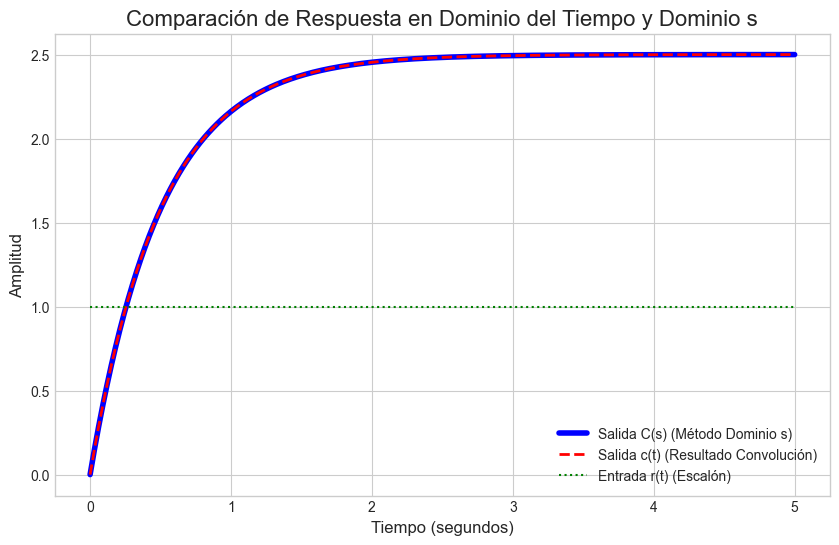

In [10]:
# Paso 4: Graficar y Comparar los Resultados

plt.figure(figsize=(10, 6))

# Graficar la salida obtenida por la simulación de la biblioteca de control
plt.plot(tiempo, c_dominio_tiempo, label='Salida C(s) (Método Dominio s)', linewidth=4, color='blue')

# Graficar la salida calculada analíticamente (resultado de la convolución)
plt.plot(tiempo, c_dominio_s, label='Salida c(t) (Resultado Convolución)', linestyle='--', color='red', linewidth=2)

# Graficar la señal de entrada r(t)
plt.plot(tiempo, np.ones_like(tiempo), label='Entrada r(t) (Escalón)', linestyle=':', color='green')

# Títulos y etiquetas
plt.title('Comparación de Respuesta en Dominio del Tiempo y Dominio s', fontsize=16)
plt.xlabel('Tiempo (segundos)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


### Conclusión de la Práctica

Como se observa en la gráfica, la línea azul (simulada) y la línea roja (analítica) se superponen perfectamente.

Esto demuestra que:
1. El método de la **Función de Transferencia** en el dominio 's' es una herramienta precisa para el análisis de sistemas.
2. La simulación con `control` produce el mismo resultado que la **convolución** en el dominio del tiempo.
3. La Transformada de Laplace simplifica el análisis, convirtiendo la convolución en una multiplicación algebraica.


### Ejercicio Propuesto: Circuito RL (Primer Orden)

**Instrucciones:**
1. Obtén la función de transferencia \( G(s) = Y(s)/R(s) \) a partir de la ecuación diferencial.
2. Calcula la respuesta analítica \( c(t) \) ante un escalón unitario.
3. Simula la respuesta en Python con `control`.
4. Grafica ambas respuestas para comparar.

Ecuación del circuito RL:
### Ejercicio Propuesto: Circuito RL (Primer Orden)

**Ecuación del circuito RL:**

$$
L \frac{dc(t)}{dt} + R\,c(t) = r(t)
$$

**Valores:**
- \( R = 4\,\Omega \)  
- \( L = 2\,H \)  
- \( r(t) \): Escalón de \(1\,V\) aplicado en \( t = 0 \)


La Función de Transferencia del sistema es:
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     1
  -------
  2 s + 4


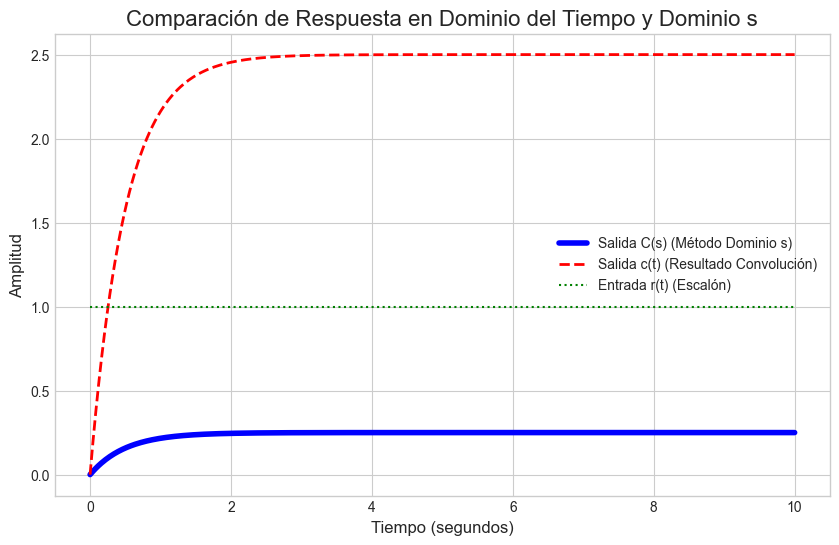

In [12]:
numerador = [1]
denominador = [2, 4]
G_s = ct.tf(numerador, denominador)

print("La Función de Transferencia del sistema es:")
print(G_s)

# Definimos el vector de tiempo para la simulación
t = np.linspace(0, 10, 500)  # Simular de 0 a 5 segundos

# Calculamos la respuesta al escalón del sistema G(s)
tiempo, c_dominio_tiempo = ct.step_response(G_s, T=t)

# Solución analítica para comparación
c_dominio_s = 2.5 * (1 - np.exp(-2 * tiempo))

# Paso 4: Graficar y Comparar los Resultados

plt.figure(figsize=(10, 6))

# Graficar la salida obtenida por la simulación de la biblioteca de control
plt.plot(tiempo, c_dominio_tiempo, label='Salida C(s) (Método Dominio s)', linewidth=4, color='blue')

# Graficar la salida calculada analíticamente (resultado de la convolución)
plt.plot(tiempo, c_dominio_s, label='Salida c(t) (Resultado Convolución)', linestyle='--', color='red', linewidth=2)

# Graficar la señal de entrada r(t)
plt.plot(tiempo, np.ones_like(tiempo), label='Entrada r(t) (Escalón)', linestyle=':', color='green')

# Títulos y etiquetas
plt.title('Comparación de Respuesta en Dominio del Tiempo y Dominio s', fontsize=16)
plt.xlabel('Tiempo (segundos)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()